In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [8]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [18]:
data = pd.read_csv("/Users/sooyeonkim/Desktop/TenStrands/Policy-Language-Analysis/cleaned_data/BP_AR_3514_cleaned.csv")

In [19]:
data = data.drop(columns = ['Unnamed: 0', 'BP 3514 Link to Policy', 'AR 3514 Link to Policy', 
                     'BP3514: Path to PDF', 'AR3514: Path to PDF', 
                     'AR3514 PDF Name', 'BP3514 PDF Name'])

data

,CDS Code,County,District Name,Locale Classifications,District Type,2023-24 Student Enrollment,2023-24 % Unduplicated,BP: 3514 Environmental Safety,BP 3514 Year Adopted,BP 3514 Year of Policy Update if applicable,AR: 3514 Environmental Safety Regulation,AR 3514 Year Adopted,AR 3514 Year of Policy Update if applicable,School Board Policy Commitments Score (out of 3),Building Electrification,Energy Efficiency,On-Site Renewables,HVAC: AC,Indoor Air Quality,Energy Resilience,Fleet Electrification,EV Chargers for Parking,Water Conservation,Zero Waste Initiative,Schoolyard Forest,School Gardens,District-Wide Curriculum Environmental or Climate Literacy Indicators (up to 3),Overall District Action and Literacy Initiative Indicators (up to 10),Staff Capacity Indicators (up to 4),W/O Policy Environmental and Climate Action Score (17 points),"Plans, Communication, and Awards Indicators (up to 3)",District-Wide Campus Sustainability Indicators (up to 3),District-Wide Environmental Community and Culture Indicators (up to 3),Environmental and Climate Action Score (20 points),BP3514: PDF Text,AR3514: PDF Text
0,1611190000000,Alameda,Alameda Unified,Suburban,Unified School District,10557,41,1,2009,2018,1.0,2009,2019,3.0,1,1,1,1.0,1.0,1,1.0,0.0,1,1,0,1,2.0,7.50,1,11.00,2.5,3.00,1.5,14.00,llaasstt rreevviisseedd ddaattee governin...,superintendent may designate train one e...
1,1611270000000,Alameda,Albany City Unified,Suburban,Unified School District,3574,37,0,NaN,NaN,1.0,2013,2013,3.0,0,1,1,1.0,1.0,1,0.0,0.0,1,1,0,1,1.5,7.00,3,11.50,1.5,3.00,2.0,15.00,none,superintendent may designate train one e...
2,1611500000000,Alameda,Castro Valley Unified,Suburban,Unified School District,9489,43,1,2018,*,1.0,2019,*,3.0,1,1,1,1.0,1.0,1,1.0,1.0,1,1,0,1,2.0,6.50,0,7.50,1.0,3.00,1.5,10.50,boarddocs plus book board policy section bu...,1125 638 pm boarddocs plus book board policy s...
3,1611680000000,Alameda,Emery Unified,Suburban,Unified School District,600,81,1,2004,2004,1.0,2004,2004,3.0,0,0,1,1.0,1.0,0,0.0,0.0,1,1,0,0,0.0,3.00,0,3.00,0.0,2.50,0.5,6.00,board education recognizes obligation prov...,air quality superintendent designee shall ...
4,1611760000000,Alameda,Fremont Unified,Suburban,Unified School District,33063,33,1,2020,2020,1.0,2020,2020,3.0,1,1,1,1.0,1.0,1,1.0,1.0,1,1,0,1,2.0,7.50,2,11.00,1.5,3.00,2.5,14.00,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,57726940000000,Yolo,Washington Unified,Urban,Unified School District,8282,67,1,2017,2017,1.0,2017,2017,3.0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,1,0.0,1.50,1,3.00,0.5,1.50,0.0,6.00,environmental safety bp governing board r...,ppoolliiccyy eennvviirroonnmmeennttaall ssaaff...
700,57727020000000,Yolo,Winters Joint Unified,Town,Unified School District,2279,58,1,2001,2018,1.0,2001,2018,3.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.50,0,0.50,0.0,0.50,0.0,3.50,business noninstructional operation bp concep...,business noninstructional operation bp 3000 co...
701,58727360000000,Yuba,Marysville Joint Unified,Suburban,Unified School District,10539,71,1,2008,2008,1.0,2008,2008,3.0,0,1,0,0.0,0.0,1,0.0,0.0,0,0,0,1,0.0,1.50,0,2.00,0.5,1.50,0.0,5.00,board education recognizes obligation prov...,air quality superintendent designee shall ...
702,58727440000000,Yuba,Plumas Lake Elementary,Town,Elementary School District,1603,45,1,2018,2018,1.0,2018,2018,3.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0,0,1,0.5,1.00,0,1.00,0.0,0.50,0.0,4.00,board trustee recognizes obligation provi...,plumaslakeelementaryschooldistrict superin...


In [22]:
# Extending stop words list
additional_stopwords = {'cf', '40', 'shall', 'cfr', 'may'}
all_stopwords = stopwords.words('english') + list(additional_stopwords)

lemmatizer = WordNetLemmatizer()

# Function to preprocess text 
def preprocess_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    clean_text = ' '.join([word for word in lemmatized_words if word not in all_stopwords])
    return clean_text

def analyze_text(data, column_name):
    vectorizer = CountVectorizer(stop_words=all_stopwords)
    processed_texts = data[column_name].dropna().apply(preprocess_text)
    X = vectorizer.fit_transform(processed_texts)
    word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    return word_counts.sum().sort_values(ascending=False)

# Run text analysis 
bp3514_text_analysis = analyze_text(data, 'BP3514: PDF Text')
ar3514_text_analysis = analyze_text(data, 'AR3514: PDF Text')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sooyeonkim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sooyeonkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


school            4472
staff             4381
student           3542
environmental     3144
district          2950
facility          2675
designee          2488
hazard            2353
superintendent    2322
strategy          2115
health            2076
board             2025
healthy           2002
provide           1755
andor             1744
risk              1721
agency            1699
air               1654
may               1422
reducing          1387
dtype: int64
school                16597
building              10357
cfr                    9183
district               8989
may                    8184
water                  7602
lead                   7550
material               7266
maintenance            7206
staff                  6733
facility               6152
superintendent         5793
air                    5668
asbestos               5500
activity               5269
asbestoscontaining     5175
health                 5161
designee               4787
drinking               

In [12]:
print(bp3514_text_analysis.head(20))

shall             4876
school            4472
staff             4381
cf                3602
student           3542
environmental     3144
district          2950
facility          2675
designee          2488
hazard            2353
superintendent    2322
strategy          2115
health            2076
board             2025
healthy           2002
provide           1755
andor             1744
risk              1721
agency            1699
air               1654
dtype: int64


In [13]:
print(ar3514_text_analysis.head(20))

shall                 37023
school                16597
building              10357
40                     9205
cfr                    9183
district               8989
water                  7602
lead                   7550
material               7266
maintenance            7206
staff                  6733
facility               6152
superintendent         5793
air                    5668
asbestos               5500
activity               5269
asbestoscontaining     5175
health                 5161
designee               4787
drinking               4769
dtype: int64


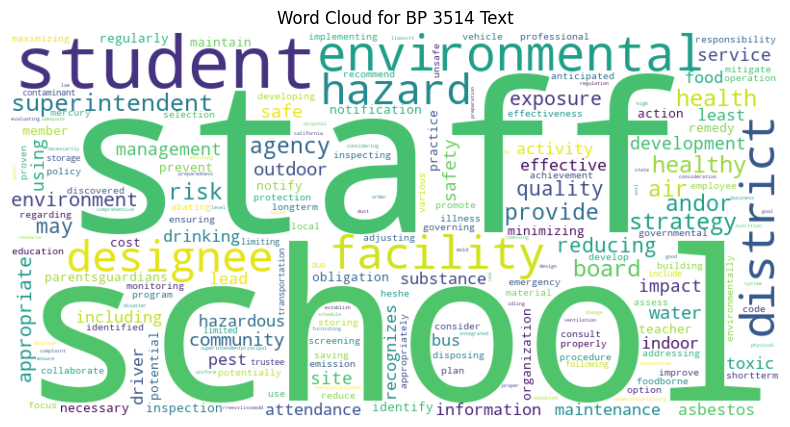

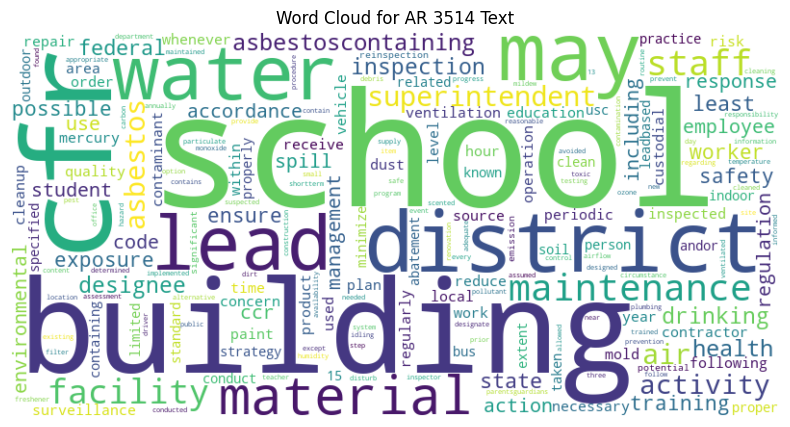

In [25]:
# Function to create a word cloud from a series of word counts
def create_word_cloud(word_counts, title):
    word_frequencies = word_counts.to_dict()
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Create word clouds for both policy texts
create_word_cloud(bp3514_text_analysis, 'Word Cloud for BP 3514 Text')
create_word_cloud(ar3514_text_analysis, 'Word Cloud for AR 3514 Text')

Environmental and Climate Action Score (20 points)                                 1.000000
W/O Policy Environmental and Climate Action Score (17 points)                      0.993847
Overall District Action and Literacy Initiative Indicators (up to 10)              0.900149
District-Wide Campus Sustainability Indicators (up to 3)                           0.744149
District-Wide Curriculum Environmental or Climate Literacy Indicators (up to 3)    0.729517
District-Wide Environmental Community and Culture Indicators (up to 3)             0.711990
Staff Capacity Indicators (up to 4)                                                0.690610
Plans, Communication, and Awards Indicators (up to 3)                              0.649303
On-Site Renewables                                                                 0.562541
School Gardens                                                                     0.524514
Energy Efficiency                                                               

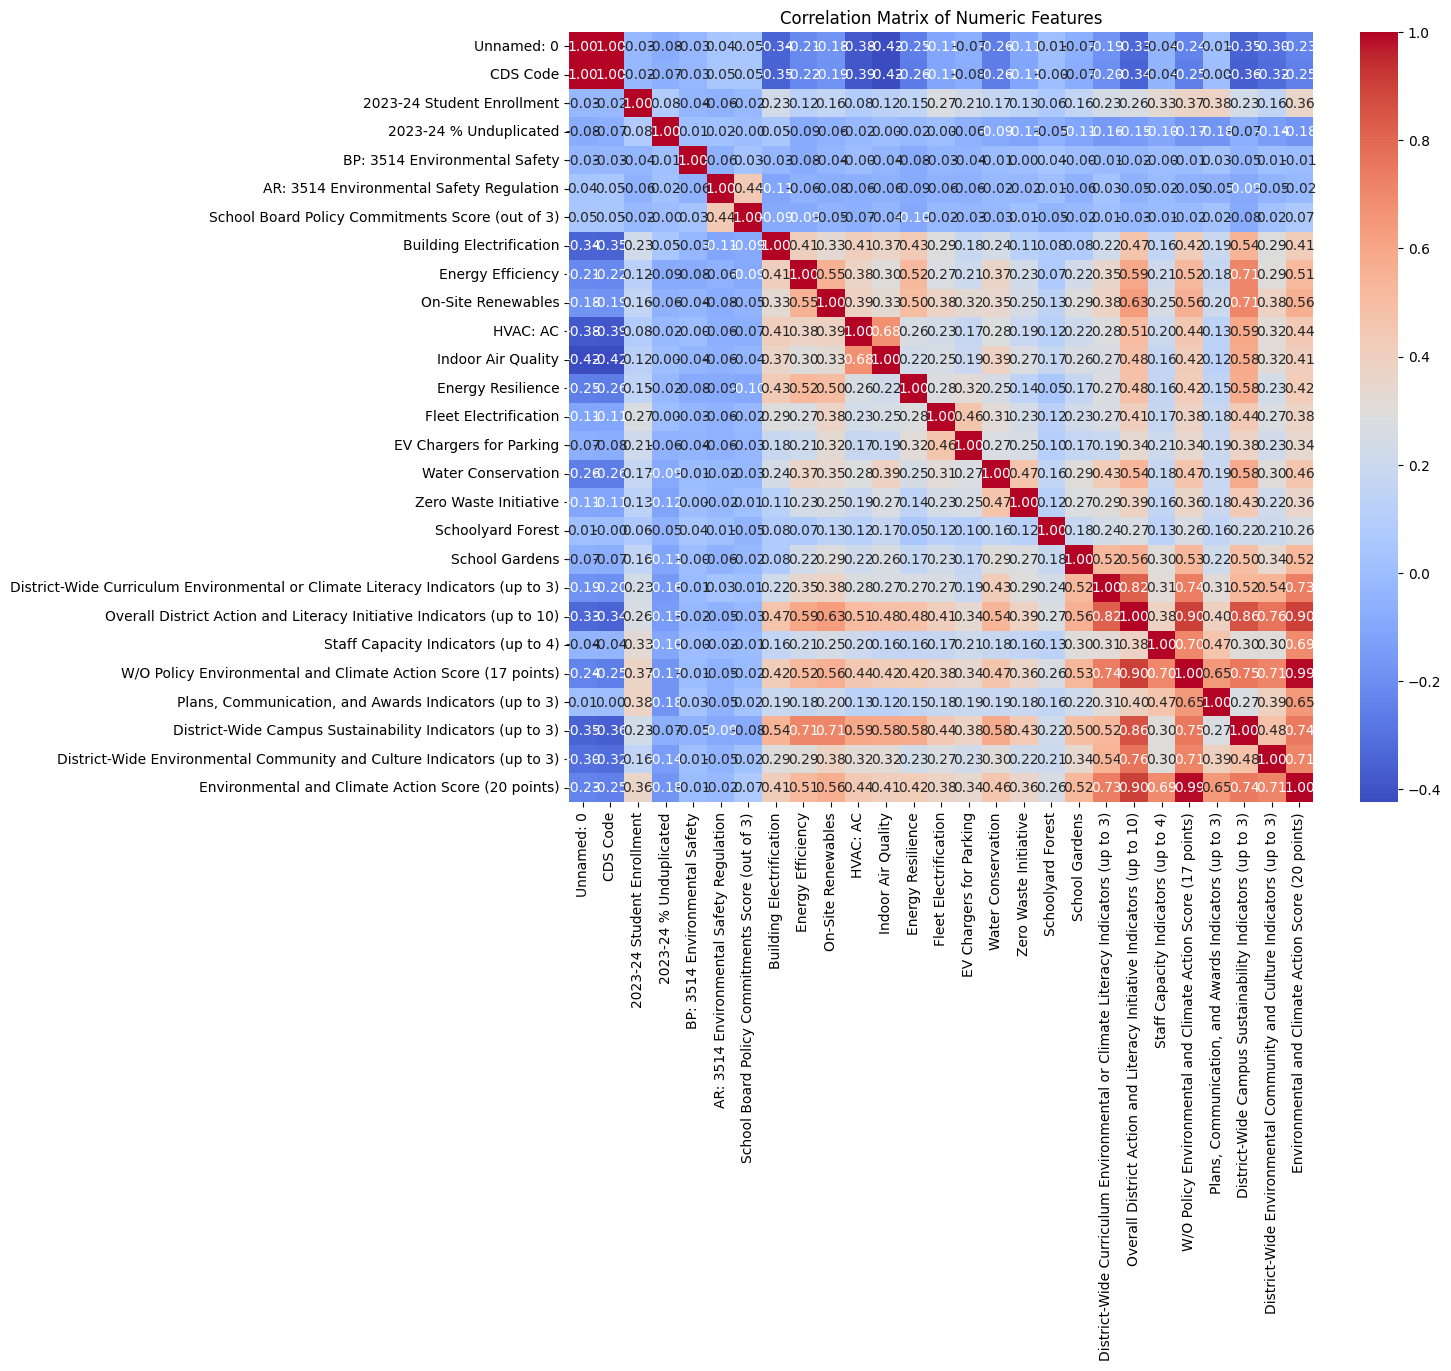

In [15]:
# Drop non-numeric columns for correlation analysis
numeric_cols = data.select_dtypes(include=[np.number])
numeric_cols.fillna(numeric_cols.mean(), inplace=True)

# Calculate correlations
correlation_matrix = numeric_cols.corr()

# Print the correlation with 'Environmental and Climate Action Score (20 points)'
target_correlation = correlation_matrix['Environmental and Climate Action Score (20 points)']
print(target_correlation.sort_values(ascending=False))

# Visualization with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [56]:
from textblob import TextBlob

def analyze_sentiment(text):
    return TextBlob(text).sentiment

# Apply sentiment analysis to a column of text
data['Sentiment'] = data['BP3514: PDF Text'].apply(lambda x: analyze_sentiment(x) if pd.notna(x) else None)

In [57]:
# Calculate average polarity and subjectivity for the dataset
average_polarity = data['Sentiment'].apply(lambda x: x.polarity if x is not None else None).mean()
average_subjectivity= data['Sentiment'].apply(lambda x: x.subjectivity if x is not None else None).mean()

print("Average Polarity: ", average_polarity)
print("Average Subjectivity: ", average_subjectivity)

Average Polarity:  0.21820550232552002
Average Subjectivity:  0.43140804669451177


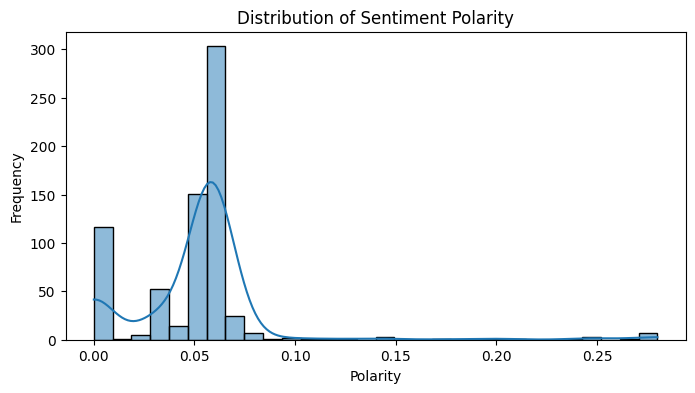

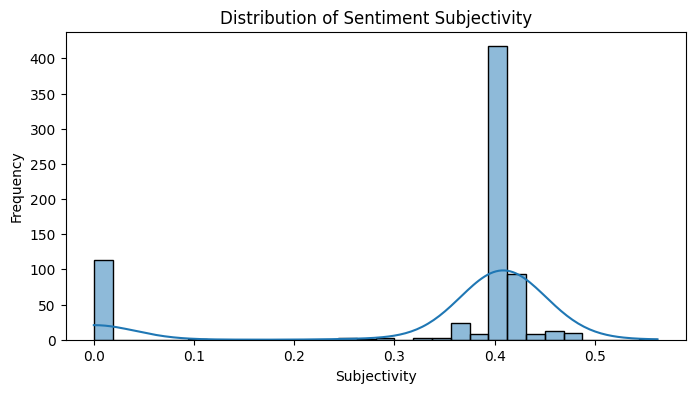

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create separate columns for polarity and subjectivity
data['BP Polarity'] = data['BP Sentiment'].apply(lambda x: x.polarity if x is not None else None)
data['BP Subjectivity'] = data['BP Sentiment'].apply(lambda x: x.subjectivity if x is not None else None)

# Histogram of polarity
plt.figure(figsize=(8, 4))
sns.histplot(data['Polarity'].dropna(), bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Histogram of subjectivity
plt.figure(figsize=(8, 4))
sns.histplot(data['Subjectivity'].dropna(), bins=30, kde=True)
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

                                                    Polarity  Subjectivity  \
Polarity                                            1.000000      0.634708   
Subjectivity                                        0.634708      1.000000   
Environmental and Climate Action Score (20 points) -0.036351     -0.054258   

                                                    Environmental and Climate Action Score (20 points)  
Polarity                                                                                    -0.036351   
Subjectivity                                                                                -0.054258   
Environmental and Climate Action Score (20 points)                                           1.000000   


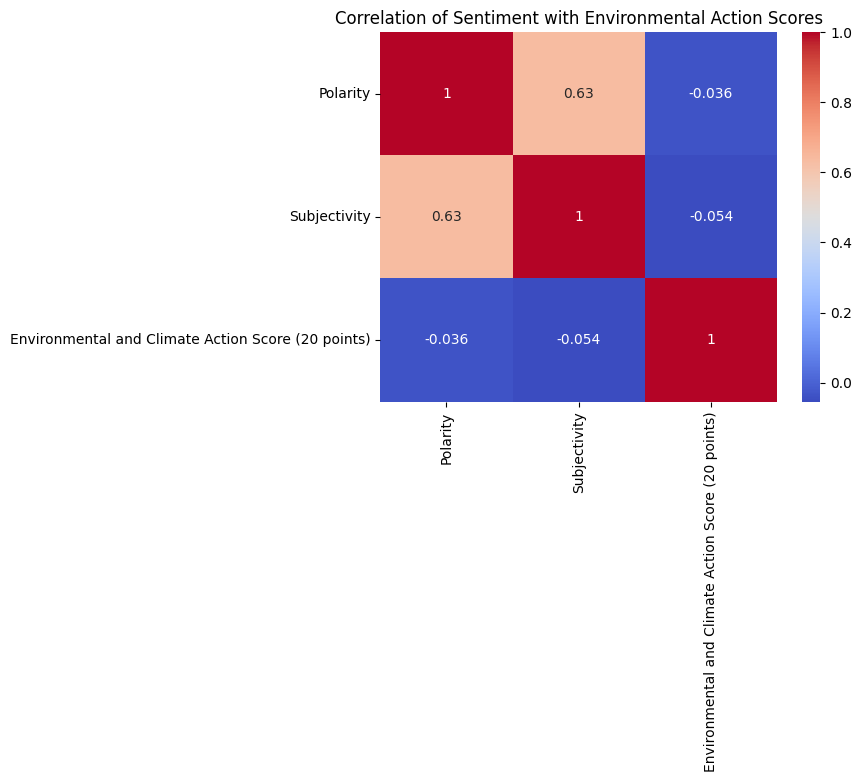

In [59]:
# Correlation of sentiment with environmental action score
correlation_matrix = data[['Polarity', 'Subjectivity', 'Environmental and Climate Action Score (20 points)']].corr()
print(correlation_matrix)

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Sentiment with Environmental Action Scores')
plt.show()

In [60]:
# Group by District Type and calculate average polarity and subjectivity
grouped_sentiment = data.groupby('District Type').agg({
    'Polarity': 'mean',
    'Subjectivity': 'mean'
}).reset_index()

print(grouped_sentiment)

                District Type  Polarity  Subjectivity
0  Elementary School District  0.053097      0.345328
1        High School District  0.054052      0.351056
2     Unified School District  0.049344      0.333954


In [61]:
# Group by County and calculate average polarity and subjectivity
grouped_sentiment = data.groupby('County').agg({
    'Polarity': 'mean',
    'Subjectivity': 'mean'
}).reset_index()

print(grouped_sentiment)

             County  Polarity  Subjectivity
0           Alameda  0.042436      0.322017
1            Alpine  0.055833      0.408889
2            Amador  0.063880      0.398577
3             Butte  0.075096      0.365035
4         Calaveras  0.060035      0.420622
5            Colusa  0.043967      0.307666
6      Contra Costa  0.045640      0.343023
7         Del Norte  0.055833      0.408889
8         El Dorado  0.055823      0.297754
9            Fresno  0.070150      0.324270
10            Glenn  0.059606      0.408519
11         Humboldt  0.070461      0.345082
12         Imperial  0.041969      0.331543
13             Inyo  0.056469      0.409994
14             Kern  0.072621      0.351248
15            Kings  0.043809      0.347509
16             Lake  0.056480      0.398472
17           Lassen  0.042447      0.343717
18      Los Angeles  0.048764      0.332693
19           Madera  0.050219      0.358510
20            Marin  0.036270      0.288541
21         Mariposa  0.000000   

In [62]:
# Determine top-performing schools
threshold = data['Environmental and Climate Action Score (20 points)'].quantile(0.9)  # top 10%
top_schools = data[data['Environmental and Climate Action Score (20 points)'] >= threshold]

In [63]:
# Analyze text data of top-performing schools
top_terms = analyze_text(top_schools, 'BP3514: PDF Text')
print("Top terms in high-scoring schools:")
print(top_terms.head(20))

Top terms in high-scoring schools:
staff             470
school            439
environmental     362
student           344
facility          279
designee          270
hazard            263
superintendent    262
district          256
health            229
strategy          221
healthy           220
board             204
air               187
provide           186
andor             183
risk              181
agency            175
quality           154
environment       150
dtype: int64


In [64]:
# Determine lower-performing schools
low_threshold = data['Environmental and Climate Action Score (20 points)'].quantile(0.1)  # bottom 10%
low_schools = data[data['Environmental and Climate Action Score (20 points)'] <= low_threshold]

# Analyze text data of lower-performing schools
low_terms = analyze_text(low_schools, 'BP3514: PDF Text')
print("Top terms in low-scoring schools:")
print(low_terms.head(20))

Top terms in low-scoring schools:
district          955
student           940
school            891
staff             622
board             483
environmental     410
facility          406
superintendent    368
designee          367
may               342
employee          323
hazard            318
policy            300
health            299
strategy          295
provide           293
andor             284
healthy           272
agency            263
risk              244
dtype: int64
